<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab2_b_17_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2b: Regresión.

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Cloning into 'lab2'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 42 (delta 21), reused 32 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 1.88 MiB | 8.62 MiB/s, done.
Resolving deltas: 100% (21/21), done.


## Análisis Exploratorio.

Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Establecer GPU por defecto en caso de estar disponible

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

Cargar y visualizar los datos.

In [ ]:
data = pd.read_csv('dataset-lab2-b.csv')
print(data.head())

         X1        X2         Y
0  0.918500  0.939151  0.872198
1  0.463210  0.357977  0.178228
2  0.466683  0.574127  0.282014
3  0.327067  0.087870  0.076222
4  0.547487  0.863133  0.573703


Plot de los datos.

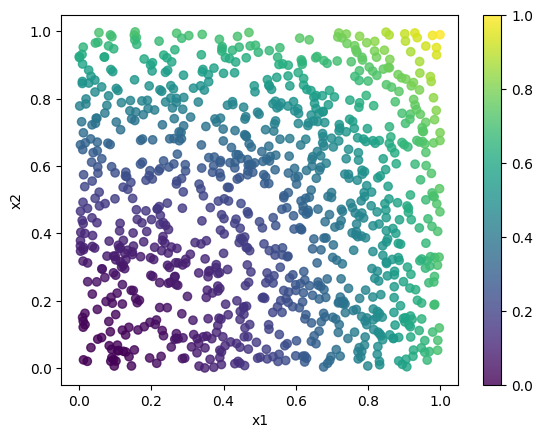

In [ ]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

# Plot the data with a color map
plt.scatter(X1, X2, c=Y, cmap='viridis', alpha=0.8)

# Axis labels
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the color bar
plt.colorbar()

plt.show()
plt.show()

Definimos nuestro modelo usando tensorflow.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Definimos una función para plotear la frontera de decisión sobre los datos.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


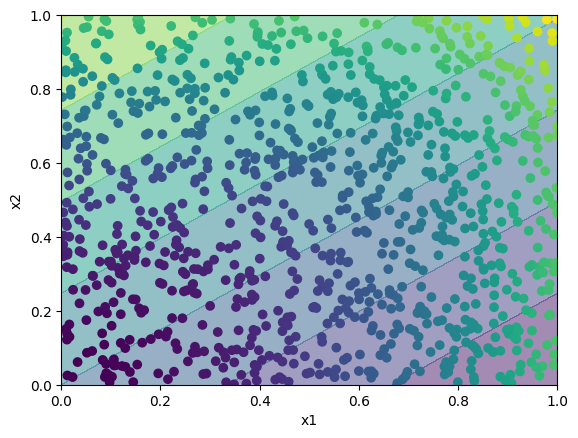

In [ ]:
def plot_results(X1, X2, Y, model):

    # Axis labels
    plt.xlabel('x1')
    plt.ylabel('x2')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.5, cmap='viridis')
    # Plot the data with a color map
    plt.scatter(X1, X2, c=Y, cmap='viridis', alpha=1)

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, model)

Entrenamos el modelo.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse')

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1154
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098
E

Plot de los resultados

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


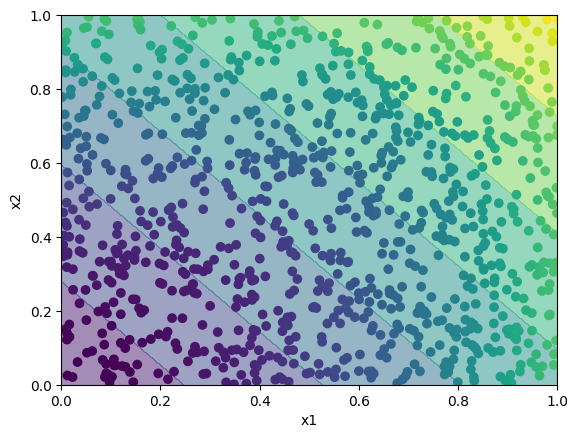

In [ ]:
plot_results(X1, X2, Y, model)

Probemos con un modelo más complejo.

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Definir un modelo más complejo en el siguiente bloque de código.

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6996
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0692
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0575
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0551
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0557
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0546
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0540
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0548
Epoch 9/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0554
Epoch 10/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550
Epoch 11/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0546
Epoch 12/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0651
Epoch 13/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0575
Epoch 14/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0538
Epoch 15/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0519
Epoch 16/60
32/32 ━

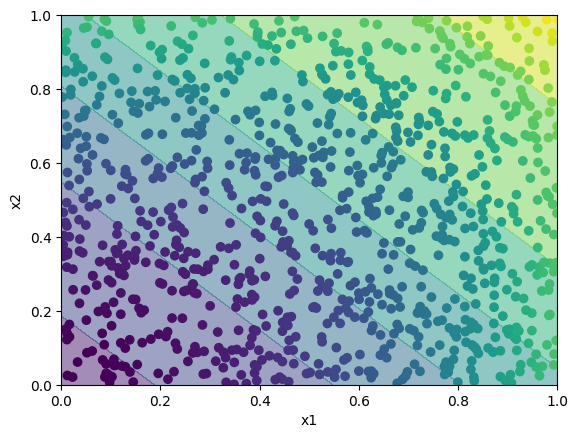

In [ ]:
model = tf.keras.Sequential([
    #### DEFINIR EL MODELO AQUI ####
    # Definir un modelo con al menos una capa oculta con 2 neuronas y una capa de salida.
    ################################

    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=4, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='linear'),
])

# Experimentar con distintos valores de learning rate
# y observar cómo afecta a la convergencia del modelo.
# Probar distintos órdenes de magnitud. Ej: 5, 0.5, 0.05, 0.005, 0.0005


optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mse')

model.fit(x=x, y=y, epochs=60)

plot_results(X1, X2, Y, model)

Experimentar con distintas arquitecturas y funciones de activación.